Predicting Credit Card Defaults
===

This data set contains credit card payment records from 30,000 Taiwanese credit card holders for six months in 2005. The data set includes attributes of credit limit, sex, highest education level attained, marital status, and age. It also includes three aspects of payment history for each of the six months: repayment status, their bill amount, and their payment amount. Finally, the data includes whether or not the individual defaulted on their payment in the month following the end of the data collection period. The data was gathered as part of a study by two Taiwanese universities, to compare the accuracy of data mining methods. Its significance and relevancy is very apparent in determining the best predictive attributes for credit card defaults. 

In this report I will attempt to begin to determine if age, marital status, or credit limit are able to predict credit card payment defaults. 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

cc_defaults = pd.read_csv('Credit Card Defaults.csv')

### Summary

In [33]:
cc_defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
cc_defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


The summary statistics for some of the attributes (sex, education, marriage), are not useful since the number values correspond to a classification. More meaningfully, we see can see the distribution of limit balance as well as the ages of the subjects. The mean limit balance is 167484 NT Dollars, and the median is 140000. The maximum limit is 1,000,000 so these extreme upper values may skew the mean. The median is probably the best measure of central tendency in this data set. 

The ages of the subjects center around a mean of 35.5 years and median of 34. The maximum is 79 and the minimum is 21. Again, the upper extremes may skew the mean, but the age data appears to be more collected in the lower end so the upper outliers have a lesser effect. 

### Comparing Age

In [124]:
no_defaults = cc_defaults.loc[cc_defaults['default.payment.next.month'] == 0]
defaults = cc_defaults.loc[cc_defaults['default.payment.next.month'] == 1]

In [125]:
nd_age = no_defaults['AGE']
de_age = defaults['AGE']

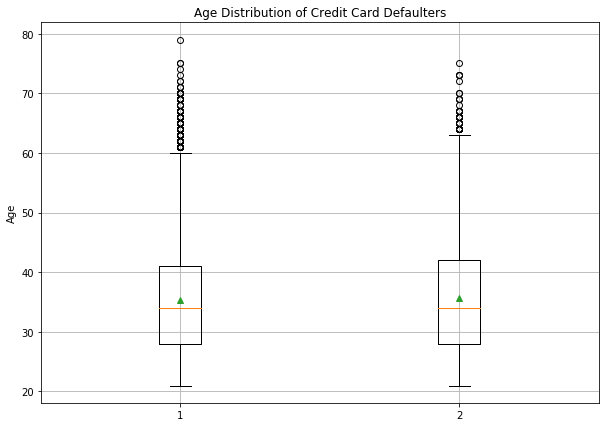

In [148]:
plt.figure(figsize=(10, 7))

plt.ylabel('Age')
plt.title('Age Distribution of Credit Card Defaulters')
plt.boxplot([nd_age, de_age], showmeans=True)
ax = plt.gca()
ax.grid(True)

plt.show()

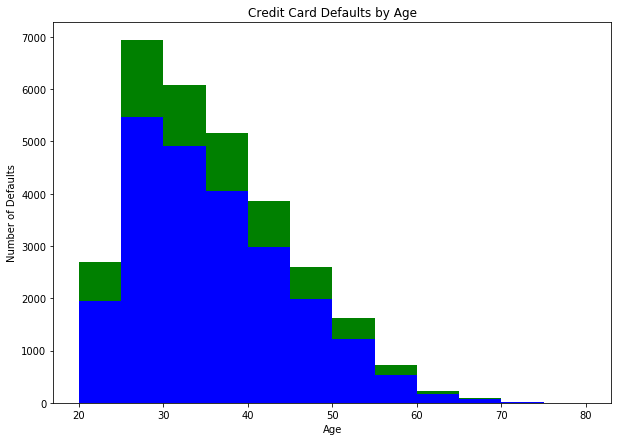

In [141]:
plt.figure(figsize=(10, 7))

plt.hist([no_defaults['AGE'],defaults['AGE']],
          bins=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], stacked=True, color = ['b','g'])

plt.title('Credit Card Defaults by Age')
plt.xlabel('Age')
plt.ylabel('Number of Defaults')
opacity = 0.5

#create legend
#from matplotlib.patches import Rectangle
#handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [no_defaults, defaults]]
#labels= ["No Default","Default"]
#plt.legend(handles, labels)

plt.show()

Default rates by age don't seem to vary considerably. Overall, those who did not default are slightly younger and more tightly centered around the median, although the total range is greater than those who did default. Let's run a T-test!

In [127]:
print(nd_age.mean())
print(de_age.mean())
print(nd_age.std())
print(de_age.std())
diff=de_age.mean( ) - nd_age.mean()
print(diff)

35.4172658791
35.7257383966
9.07735468867
9.693438484
0.308472517494


In [128]:
size = np.array([len(nd_age), len(de_age)])
sd = np.array([nd_age.std(), de_age.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

2.31952124166


In [129]:
from scipy.stats import ttest_ind
print(ttest_ind(de_age, nd_age, equal_var=False))

Ttest_indResult(statistic=2.3195212416592628, pvalue=0.020386490255874631)


### Comparing Marital Status

In [17]:
cc_marriage = cc_defaults.groupby(['MARRIAGE', 'default.payment.next.month']).count()
cc_marriage

ID  LIMIT_BAL    SEX  EDUCATION  \
MARRIAGE default.payment.next.month                                       
0        0                              49         49     49         49   
         1                               5          5      5          5   
1        0                           10453      10453  10453      10453   
         1                            3206       3206   3206       3206   
2        0                           12623      12623  12623      12623   
         1                            3341       3341   3341       3341   
3        0                             239        239    239        239   
         1                              84         84     84         84   

                                       AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
MARRIAGE default.payment.next.month                                             
0        0                              49     49     49     49     49     49   
         1                               5      5      5      5      5      5   
1        0                           10453  10453  10453  10453  10453  10453   
         1                            3206   3206   3206   3206   3206   3206   
2        0                           12623  12623  12623  12623  12623  12623   
         1                            3341   3341   3341   3341   3341   3341   
3        0                             239    239    239    239    239    239   
         1                              84     84     84     84     84     84   

                                       ...     BILL_AMT3  BILL_AMT4  \
MARRIAGE default.payment.next.month    ...                            
0        0                             ...            49         49   
         1                             ...             5          5   
1        0                             ...         10453      10453   
         1                             ...          3206       3206   
2        0                             ...         12623      12623   
         1                             ...          3341       3341   
3        0                             ...           239        239   
         1                             ...            84         84   

                                     BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
MARRIAGE default.payment.next.month                                             
0        0                                  49         49        49        49   
         1                                   5          5         5         5   
1        0                               10453      10453     10453     10453   
         1                                3206       3206      3206      3206   
2        0                               12623      12623     12623     12623   
         1                                3341       3341      3341      3341   
3        0                                 239        239       239       239   
         1                                  84         84        84        84   

                                     PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
MARRIAGE default.payment.next.month                                          
0        0                                 49        49        49        49  
         1                                  5         5         5         5  
1        0                              10453     10453     10453     10453  
         1                               3206      3206      3206      3206  
2        0                              12623     12623     12623     12623  
         1                               3341      3341      3341      3341  
3        0                                239       239       239       239  
         1                                 84        84        84        84  

[8 rows x 23 columns]

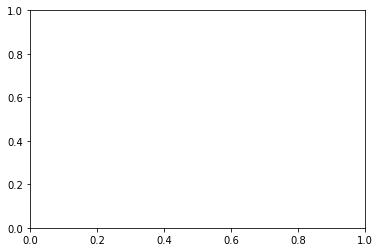

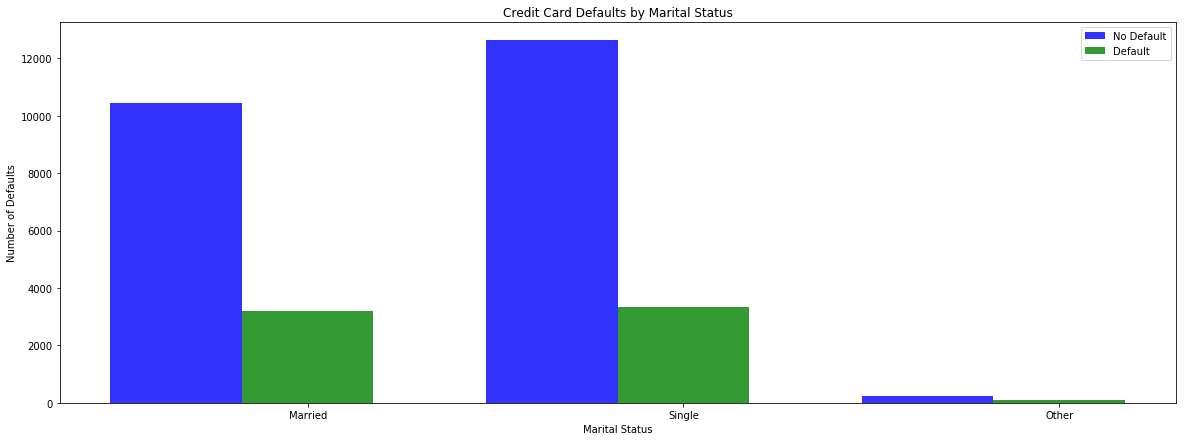

In [145]:
#plt.figure(figsize=(20, 7))
n_groups = 3
no_default = (10453, 12623, 239)
default = (3206, 3341, 84)

#plt.figure(figsize=(20, 7))
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
plt.figure(figsize=(20, 7))
rects1 = plt.bar(index, no_default, bar_width,
                 alpha=opacity,
                 color='b',
                 label='No Default')
 
rects2 = plt.bar(index + bar_width, default, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Default')
 
plt.xlabel('Marital Status')
plt.ylabel('Number of Defaults')
plt.title('Credit Card Defaults by Marital Status')
plt.xticks(index + bar_width, ('Married', 'Single', 'Other'))
plt.legend()
 
plt.show()

The raw number of defaults between the married and single subjects are very close, but there is clearly a higher number of single people who did not default than there are those who are married. This could be a significant difference. PERFORM T-TEST???

### Comparing Credit Limit

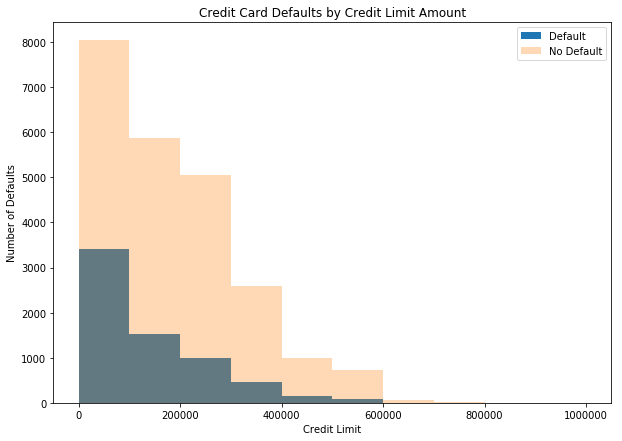

In [137]:
nd_lim = no_defaults['LIMIT_BAL']
de_lim = defaults['LIMIT_BAL']

plt.figure(figsize=(10, 7))
plt.hist(de_lim, alpha=1, label='Default', bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]) 
plt.hist(nd_lim, alpha=.3, label='No Default', bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000])
plt.legend(loc='upper right') 

plt.title('Credit Card Defaults by Credit Limit Amount')
plt.xlabel('Credit Limit')
plt.ylabel('Number of Defaults')

plt.show()

Finally, I'm curious if people with a lower credit limit have a higher chance of default. This graph appears to show that in this data set they may. Defaults for subjects with limits 10,000 and below seem to be higher in percentage than those with limits of 30,000 and above.


In [130]:
print(de_lim.mean())
print(nd_lim.mean())
print(de_lim.std())
print(nd_lim.std())
diff=nd_lim.mean( ) - de_lim.mean()
print(diff)

130109.65642
178099.726074
115378.540571
131628.35966
47990.0696548


In [131]:
size = np.array([len(de_lim), len(nd_lim)])
sd = np.array([de_lim.std(), nd_lim.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

28.9515879335


In [132]:
from scipy.stats import ttest_ind
print(ttest_ind(nd_lim, de_lim, equal_var=False))

Ttest_indResult(statistic=28.951587933509845, pvalue=3.3641002455114717e-178)


### Questions for the Future

In the future when I have more skills in my data science toolbelt, I would like to examine the monthly payment patterns of the study subjects to see if those who carry a balance that amounts to a larger percentage of their credit limit are more likely to default on their payments. I think that I could do this by plotting their monthly balances and coming up with some sort of comparative score for each, and then comparing the scores of those that defaulted against those that did not. 

I would also like to compare the predictive power of each attribute to see if any attribute is better able to predict defaults than the others. I'm not sure how this would be accomplished, but I am certain that there are methods that I will learn that will make this possible and even straightforward. 